In [623]:
import pandas as pd
Wage = pd.read_csv('Wage.csv')


In [624]:
print(Wage.shape[1])
for col in Wage.columns:
    print(col)

12
Unnamed: 0
year
age
maritl
race
education
region
jobclass
health
health_ins
logwage
wage


In [625]:
Wage = Wage.drop(columns=["logwage"])
print(Wage.shape[1])
for col in Wage.columns:
    print(col)

11
Unnamed: 0
year
age
maritl
race
education
region
jobclass
health
health_ins
wage


In [626]:
Wage.shape[0]

3000

In [627]:
Wage

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,130.982177
3,155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,154.685293
4,11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,376816,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,154.685293
2996,302281,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,99.689464
2997,10033,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,66.229408
2998,14375,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,87.981033


In [628]:
print(Wage.describe())
Wage.describe(include = ['O'])

          Unnamed: 0         year          age         wage
count    3000.000000  3000.000000  3000.000000  3000.000000
mean   218883.373000  2005.791000    42.414667   111.703608
std    145654.072587     2.026167    11.542406    41.728595
min      7373.000000  2003.000000    18.000000    20.085537
25%     85622.250000  2004.000000    33.750000    85.383940
50%    228799.500000  2006.000000    42.000000   104.921507
75%    374759.500000  2008.000000    51.000000   128.680488
max    453870.000000  2009.000000    80.000000   318.342430


,maritl,race,education,region,jobclass,health,health_ins
count,3000,3000,3000,3000,3000,3000,3000
unique,5,4,5,1,2,2,2
top,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes
freq,2074,2480,971,3000,1544,2142,2083



Plot the age feature and linear regression:



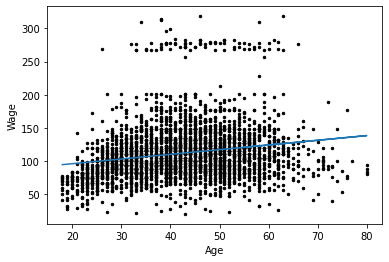

In [2]:
#1 age
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
Wage = pd.read_csv('Wage.csv')

def myfunc(x):
  return slope * x + intercept

year_list = Wage["year"].tolist()
log_list = Wage["logwage"].tolist()
age_list = Wage["age"].tolist()
Wage_list = Wage["wage"].tolist()

slope, intercept, r, p, std_err = stats.linregress(age_list, Wage_list)
mymodel = list(map(myfunc, age_list))

plt.xlabel("Age")
plt.ylabel("Wage")

plt.scatter(age_list, Wage_list, color = 'black', s = 6)
plt.plot(age_list, mymodel)
print("\nPlot the age feature and linear regression:\n")
plt.show()


Test the normality of age feature:



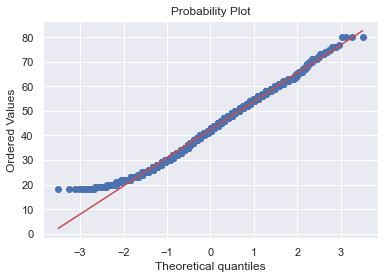

ShapiroResult(statistic=0.9910538792610168, pvalue=9.371995367268848e-13)

In [630]:
#1 age
import matplotlib.pyplot as plt
from scipy.stats import shapiro

stats.probplot(age_list, dist="norm", plot=plt)
print("\nTest the normality of age feature:\n")
plt.show()
s_shapiro1,p_shapiro_age = shapiro(age_list)
shapiro(age_list)


Test the normality of Wage feature:



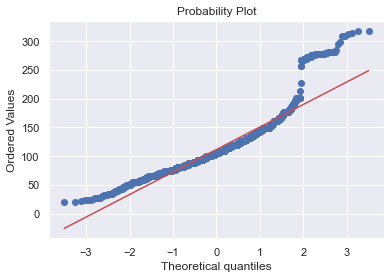

ShapiroResult(statistic=0.8795709609985352, pvalue=2.466285297211678e-43)

In [631]:
#1 wage
import matplotlib.pyplot as plt
from scipy.stats import shapiro

stats.probplot(Wage_list, dist="norm", plot=plt)
print("\nTest the normality of Wage feature:\n")
plt.show()
s_shapiro1,p_shapiro_wage = shapiro(Wage_list)
shapiro(Wage_list)

In [632]:
#1 age
import scipy.stats
import numpy as np

res = scipy.stats.pearsonr(age_list, Wage_list)
cor = res[0]
pvalue = res[1]
z = np.arctanh(cor)
sigma = (1/((len(Wage.index)-3)**0.5))
cint = z + np.array([-1, 1]) * sigma * stats.norm.ppf((1+0.95)/2)
confidence_interval = np.tanh(cint)
print("\nTest age correlation using an pearsonr test:\n")

print("confidence_interval:", confidence_interval, '\n', "sigma:", sigma, '\n', "z:", z,'\n', "cor:", cor,'\n',
      "p-value:", pvalue)


Test age correlation using an pearsonr test:

confidence_interval: [0.16097773 0.22981473] 
 sigma: 0.018266554145039696 
 z: 0.19819206804107747 
 cor: 0.19563720156358874 
 p-value: 2.9007776751953376e-27


In [633]:
#1 age
print("Interprete Age result:\n 1- First starting by plotting the age feature and drawing linear regrission, to see the relationship between data points.\n As we can see the relation is so small between the points.\
      \n\n2- I have applied Shapiro Wilk test and the test rejects the hypothesis of normality when the p-value is less than or equal to 0.05, the result of p-value was:", p_shapiro_age,"and hypothesis of normality is rejected.\
      \n\n 3- Apply Pearson correlation coefficient to see the strength of linear relationship between them\
      \nas a result of correlation:", cor,"which indecates there is no correlation as we saw in number 1.")

Interprete Age result:
 1- First starting by plotting the age feature and drawing linear regrission, to see the relationship between data points.
 As we can see the relation is so small between the points.      

2- I have applied Shapiro Wilk test and the test rejects the hypothesis of normality when the p-value is less than or equal to 0.05, the result of p-value was: 9.371995367268848e-13 and hypothesis of normality is rejected.      

 3- Apply Pearson correlation coefficient to see the strength of linear relationship between them      
as a result of correlation: 0.19563720156358874 which indecates there is no correlation as we saw in number 1.



Plot the year feature:



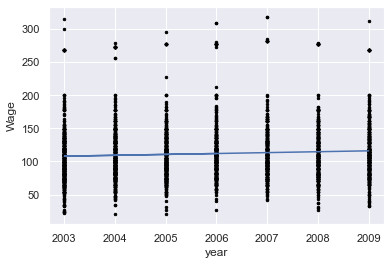

In [634]:
#2 year
plt.xlabel("year")
plt.ylabel("Wage")

slope, intercept, r, p, std_err = stats.linregress(year_list, Wage_list)
mymodel = list(map(myfunc, year_list))

plt.scatter(year_list, Wage_list, color = 'black', s = 6)
plt.plot(year_list, mymodel)
print("\nPlot the year feature:\n")
plt.show()


Test the normality of year feature:



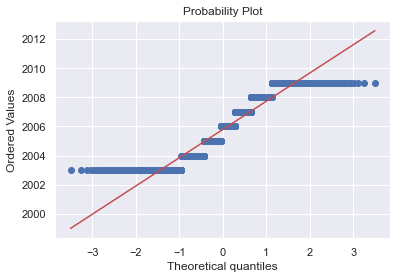

ShapiroResult(statistic=0.9110633730888367, pvalue=9.024160323272959e-39)

In [635]:
#2 year
stats.probplot(year_list, dist="norm", plot=plt)
print("\nTest the normality of year feature:\n")
plt.show()
s_shapiro2,p_shapiro_year = shapiro(year_list)
shapiro(year_list)

In [636]:
#2 year
res = scipy.stats.pearsonr(year_list, Wage_list)
cor2 = res[0]
pvalue = res[1]
z = np.arctanh(cor2)
sigma = (1/((len(Wage.index)-3)**0.5))
cint = z + np.array([-1, 1]) * sigma * stats.norm.ppf((1+0.95)/2)
confidence_interval = np.tanh(cint)
print("\nTest year correlation using an pearsonr test:\n")

print("confidence_interval:", confidence_interval, '\n', "sigma:", sigma, '\n', "z:", z,'\n', "cor:", cor2,'\n',
      "p-value:", pvalue)


Test year correlation using an pearsonr test:

confidence_interval: [0.02982774 0.10109365] 
 sigma: 0.018266554145039696 
 z: 0.0656383812061198 
 cor: 0.06554427797296235 
 p-value: 0.00032767779260315874


In [637]:
#2 year
print("Interprete year result:\n 1- First starting by plotting the year feature and drawing linear regrission, to see the relationship between data points.\n As we can see the relation is so small between the points.\
      \n\n2- I have applied Shapiro Wilk test and the test rejects the hypothesis of normality when the p-value is less than or equal to 0.05, the result of p-value was:", p_shapiro_year,"and hypothesis of normality is rejected.\
      \n\n 3- Apply Pearson correlation coefficient to see the strength of linear relationship between them\
      \nas a result of correlation:", cor2,"which indecates there is no correlation as we saw in number 1.")

Interprete year result:
 1- First starting by plotting the year feature and drawing linear regrission, to see the relationship between data points.
 As we can see the relation is so small between the points.      

2- I have applied Shapiro Wilk test and the test rejects the hypothesis of normality when the p-value is less than or equal to 0.05, the result of p-value was: 9.024160323272959e-39 and hypothesis of normality is rejected.      

 3- Apply Pearson correlation coefficient to see the strength of linear relationship between them      
as a result of correlation: 0.06554427797296235 which indecates there is no correlation as we saw in number 1.



Plot the logwage feature:



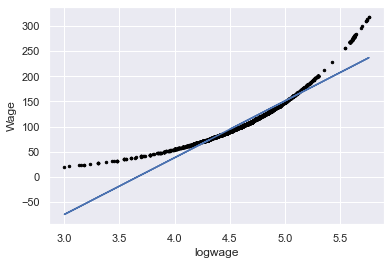

In [638]:
#3 logwage
plt.xlabel("logwage")
plt.ylabel("Wage")

slope, intercept, r, p, std_err = stats.linregress(log_list, Wage_list)
mymodel = list(map(myfunc, log_list))

plt.scatter(log_list, Wage_list, color = 'black', s = 6)
plt.plot(log_list, mymodel)
print("\nPlot the logwage feature:\n")
plt.show()


Test the normality of year feature:



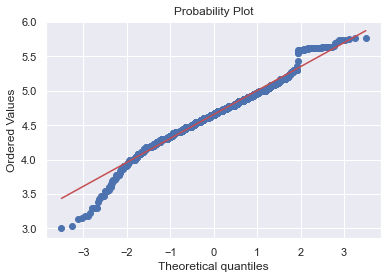

ShapiroResult(statistic=0.976961076259613, pvalue=1.2163712112173404e-21)

In [639]:
#3 logwage
stats.probplot(log_list, dist="norm", plot=plt)
print("\nTest the normality of year feature:\n")
plt.show()
s_shapiro2,p_shapiro_logwage = shapiro(log_list)
shapiro(log_list)

In [640]:
#3 logwage
res = scipy.stats.pearsonr(log_list, Wage_list)
cor3 = res[0]
pvalue = res[1]
z = np.arctanh(cor2)
sigma = (1/((len(Wage.index)-3)**0.5))
cint = z + np.array([-1, 1]) * sigma * stats.norm.ppf((1+0.95)/2)
confidence_interval = np.tanh(cint)
print("\nTest logwage correlation using an Pearsonr test:\n")

print("confidence_interval:", confidence_interval, '\n', "sigma:", sigma, '\n', "z:", z,'\n', "cor:", cor3,'\n',
      "p-value:", pvalue)


Test logwage correlation using an Pearsonr test:

confidence_interval: [0.02982774 0.10109365] 
 sigma: 0.018266554145039696 
 z: 0.0656383812061198 
 cor: 0.950683367142394 
 p-value: 0.0


In [641]:
#3 logwage
print("Interprete year result:\n 1- First starting by plotting the logwage feature and drawing linear regrission, to see the relationship between data points.\n As we can see the relation is very big between the points.\
      \n\n2- I have applied Shapiro Wilk test and the test rejects the hypothesis of normality when the p-value is less than or equal to 0.05, the result of p-value was:", p_shapiro_logwage,"and hypothesis of normality is rejected.\
      \n\n 3- Apply Pearson correlation coefficient to see the strength of linear relationship between them\
      \nas a result of correlation:", cor3,"which indecates there is correlation as we saw in number 1.")

Interprete year result:
 1- First starting by plotting the logwage feature and drawing linear regrission, to see the relationship between data points.
 As we can see the relation is very big between the points.      

2- I have applied Shapiro Wilk test and the test rejects the hypothesis of normality when the p-value is less than or equal to 0.05, the result of p-value was: 1.2163712112173404e-21 and hypothesis of normality is rejected.      

 3- Apply Pearson correlation coefficient to see the strength of linear relationship between them      
as a result of correlation: 0.950683367142394 which indecates there is correlation as we saw in number 1.


In [642]:
#Step4_education
Wage.education.unique()

array(['1. < HS Grad', '4. College Grad', '3. Some College', '2. HS Grad',
       '5. Advanced Degree'], dtype=object)

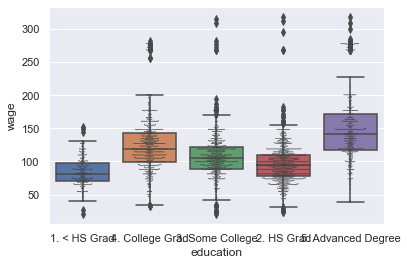

In [643]:
#Step4_education
import numpy as np;
import seaborn as sns
import pandas as pd
Wage = pd.read_csv('Wage.csv')

ax = sns.boxplot(x="education", y="wage", data=Wage)
ax = sns.swarmplot(x="education", y="wage", data=Wage, color=".25", 
                   size = 1)

In [644]:
#Step4_education
Anova_SummaryTable = sm.stats.anova_lm(ols('wage ~ education', data=Wage).fit(), typ=2)
print(Anova_SummaryTable)

                 sum_sq      df           F         PR(>F)
education  1.226364e+06     4.0  229.805921  2.915932e-172
Residual   3.995721e+06  2995.0         NaN            NaN


In [646]:
#Step4_maritl
Wage.maritl.unique()

array(['1. Never Married', '2. Married', '4. Divorced', '3. Widowed',
       '5. Separated'], dtype=object)

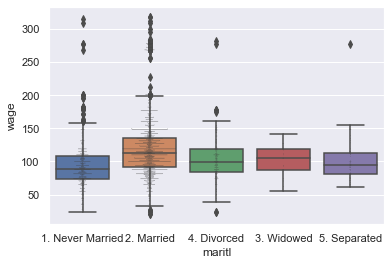

In [647]:
#Step4_maritl
import numpy as np;
import seaborn as sns
import pandas as pd
Wage = pd.read_csv('Wage.csv')

ax = sns.boxplot(x="maritl", y="wage", data=Wage)
ax = sns.swarmplot(x="maritl", y="wage", data=Wage, color=".25", 
                   size = 0.5)

In [648]:
#Step4_maritl
Anova_SummaryTable = sm.stats.anova_lm(ols('wage ~ maritl', data=Wage).fit(), typ=2)
print(Anova_SummaryTable)

                sum_sq      df          F        PR(>F)
maritl    3.631444e+05     4.0  55.959585  1.401201e-45
Residual  4.858941e+06  2995.0        NaN           NaN


In [650]:
#Step4_race
Wage.race.unique()

array(['1. White', '3. Asian', '4. Other', '2. Black'], dtype=object)

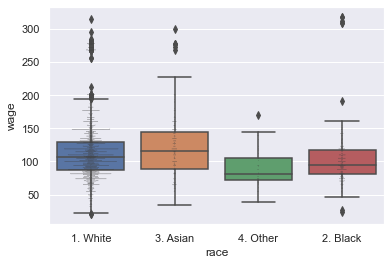

In [651]:
#Step4_race
import numpy as np;
import seaborn as sns
import pandas as pd
Wage = pd.read_csv('Wage.csv')

ax = sns.boxplot(x="race", y="wage", data=Wage)
ax = sns.swarmplot(x="race", y="wage", data=Wage, color=".25", 
                   size = 0.5)
#plt.show()

In [652]:
#Step4_race
Anova_SummaryTable = sm.stats.anova_lm(ols('wage ~ race', data=Wage).fit(), typ=2)
print(Anova_SummaryTable)

                sum_sq      df          F        PR(>F)
race      6.321174e+04     3.0  12.236674  5.890230e-08
Residual  5.158874e+06  2996.0        NaN           NaN


In [654]:
#Step4_region
Wage.region.unique()

array(['2. Middle Atlantic'], dtype=object)

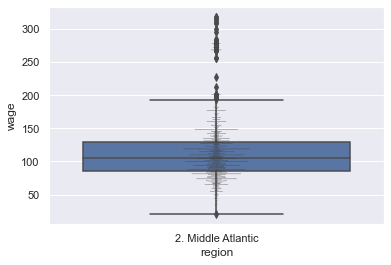

In [655]:
#Step4_region
import numpy as np;
import seaborn as sns
import pandas as pd
Wage = pd.read_csv('Wage.csv')

ax = sns.boxplot(x="region", y="wage", data=Wage)
ax = sns.swarmplot(x="region", y="wage", data=Wage, color=".25", 
                   size = 0.5)

In [657]:
#Step4_jobclass
Wage.jobclass.unique()

array(['1. Industrial', '2. Information'], dtype=object)

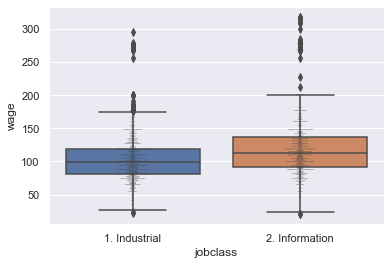

In [658]:
#Step4_jobclass
import numpy as np;
import seaborn as sns
import pandas as pd
Wage = pd.read_csv('Wage.csv')

ax = sns.boxplot(x="jobclass", y="wage", data=Wage)
ax = sns.swarmplot(x="jobclass", y="wage", data=Wage, color=".25", 
                   size = 0.5)
#plt.show()

In [659]:
#Step4_jobclass
Anova_SummaryTable = sm.stats.anova_lm(ols('wage ~ jobclass', data=Wage).fit(), typ=2)
print(Anova_SummaryTable)

                sum_sq      df           F        PR(>F)
jobclass  2.235384e+05     1.0  134.072585  2.308186e-30
Residual  4.998547e+06  2998.0         NaN           NaN


In [661]:
#Step4_6_health
Wage.health.unique()

array(['1. <=Good', '2. >=Very Good'], dtype=object)

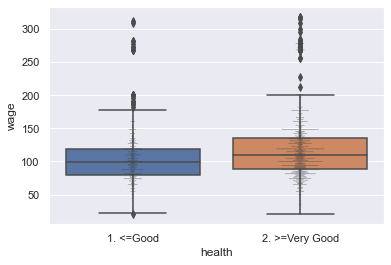

In [662]:
#Step4_6_health
import numpy as np;
import seaborn as sns
import pandas as pd
Wage = pd.read_csv('Wage.csv')

ax = sns.boxplot(x="health", y="wage", data=Wage)
ax = sns.swarmplot(x="health", y="wage", data=Wage, color=".25", 
                   size = 0.5)

In [663]:
#Step4_6_health
Anova_SummaryTable = sm.stats.anova_lm(ols('wage ~ health', data=Wage).fit(), typ=2)
print(Anova_SummaryTable)

                sum_sq      df          F        PR(>F)
health    1.211874e+05     1.0  71.226641  4.886404e-17
Residual  5.100898e+06  2998.0        NaN           NaN


In [665]:
#Step4_health_ins
Wage.health_ins.unique()

array(['2. No', '1. Yes'], dtype=object)

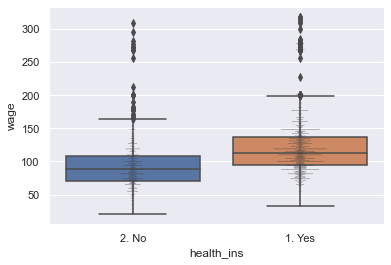

In [666]:
#Step4_health_ins
import numpy as np;
import seaborn as sns
import pandas as pd
Wage = pd.read_csv('Wage.csv')

ax = sns.boxplot(x="health_ins", y="wage", data=Wage)
ax = sns.swarmplot(x="health_ins", y="wage", data=Wage, color=".25", 
                   size = 0.5)
#plt.show()

In [667]:
#Step4_health_ins
Anova_SummaryTable = sm.stats.anova_lm(ols('wage ~ health_ins', data=Wage).fit(), typ=2)
print(Anova_SummaryTable)
#Anova_SummaryTable.describeribe()

                  sum_sq      df           F        PR(>F)
health_ins  4.963846e+05     1.0  314.907964  4.465783e-67
Residual    4.725701e+06  2998.0         NaN           NaN
